[https://machinelearningmastery.com/keras-functional-api-deep-learning/](https://machinelearningmastery.com/keras-functional-api-deep-learning/)

In [1]:
from keras.layers import *
from keras.models import Model

![](../assets/37.0-func-api.png)

In [2]:
# Define two input sets
input1 = Input(shape=(32,))
input2 = Input(shape=(128,))

# First branch: Operates on first input layer
dense1 = Dense(8, activation='relu')(input1)
dense2 = Dense(4, activation="relu")(dense1)

# Second Branch: Operates on second input layer
dense3 = Dense(64, activation='relu')(input2)
dense4 = Dense(32, activation='relu')(dense3)
dense5 = Dense(4, activation='relu')(dense4)

# Combined / Concat
combined = concatenate([dense2, dense5])


# FC Layer
dense6 = Dense(2, activation='relu')(combined)
dense7 = Dense(1, activation='linear')(dense6)



In [3]:
# This model accepts inputs of two branches and predicts a single output
model = Model(inputs=[input1,input2], outputs=[dense7])

In [4]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer         │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 8)         │        264 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │      2,080 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 4)         │         36 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 4)         │        132 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 8)         │          0 │ dense_1[0][0],    │
│ (Concatenate)       │                   │            │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 2)         │         18 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1)         │          3 │ dense_5[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,789 (42.14 KB)

 Trainable params: 10,789 (42.14 KB)

 Non-trainable params: 0 (0.00 B)

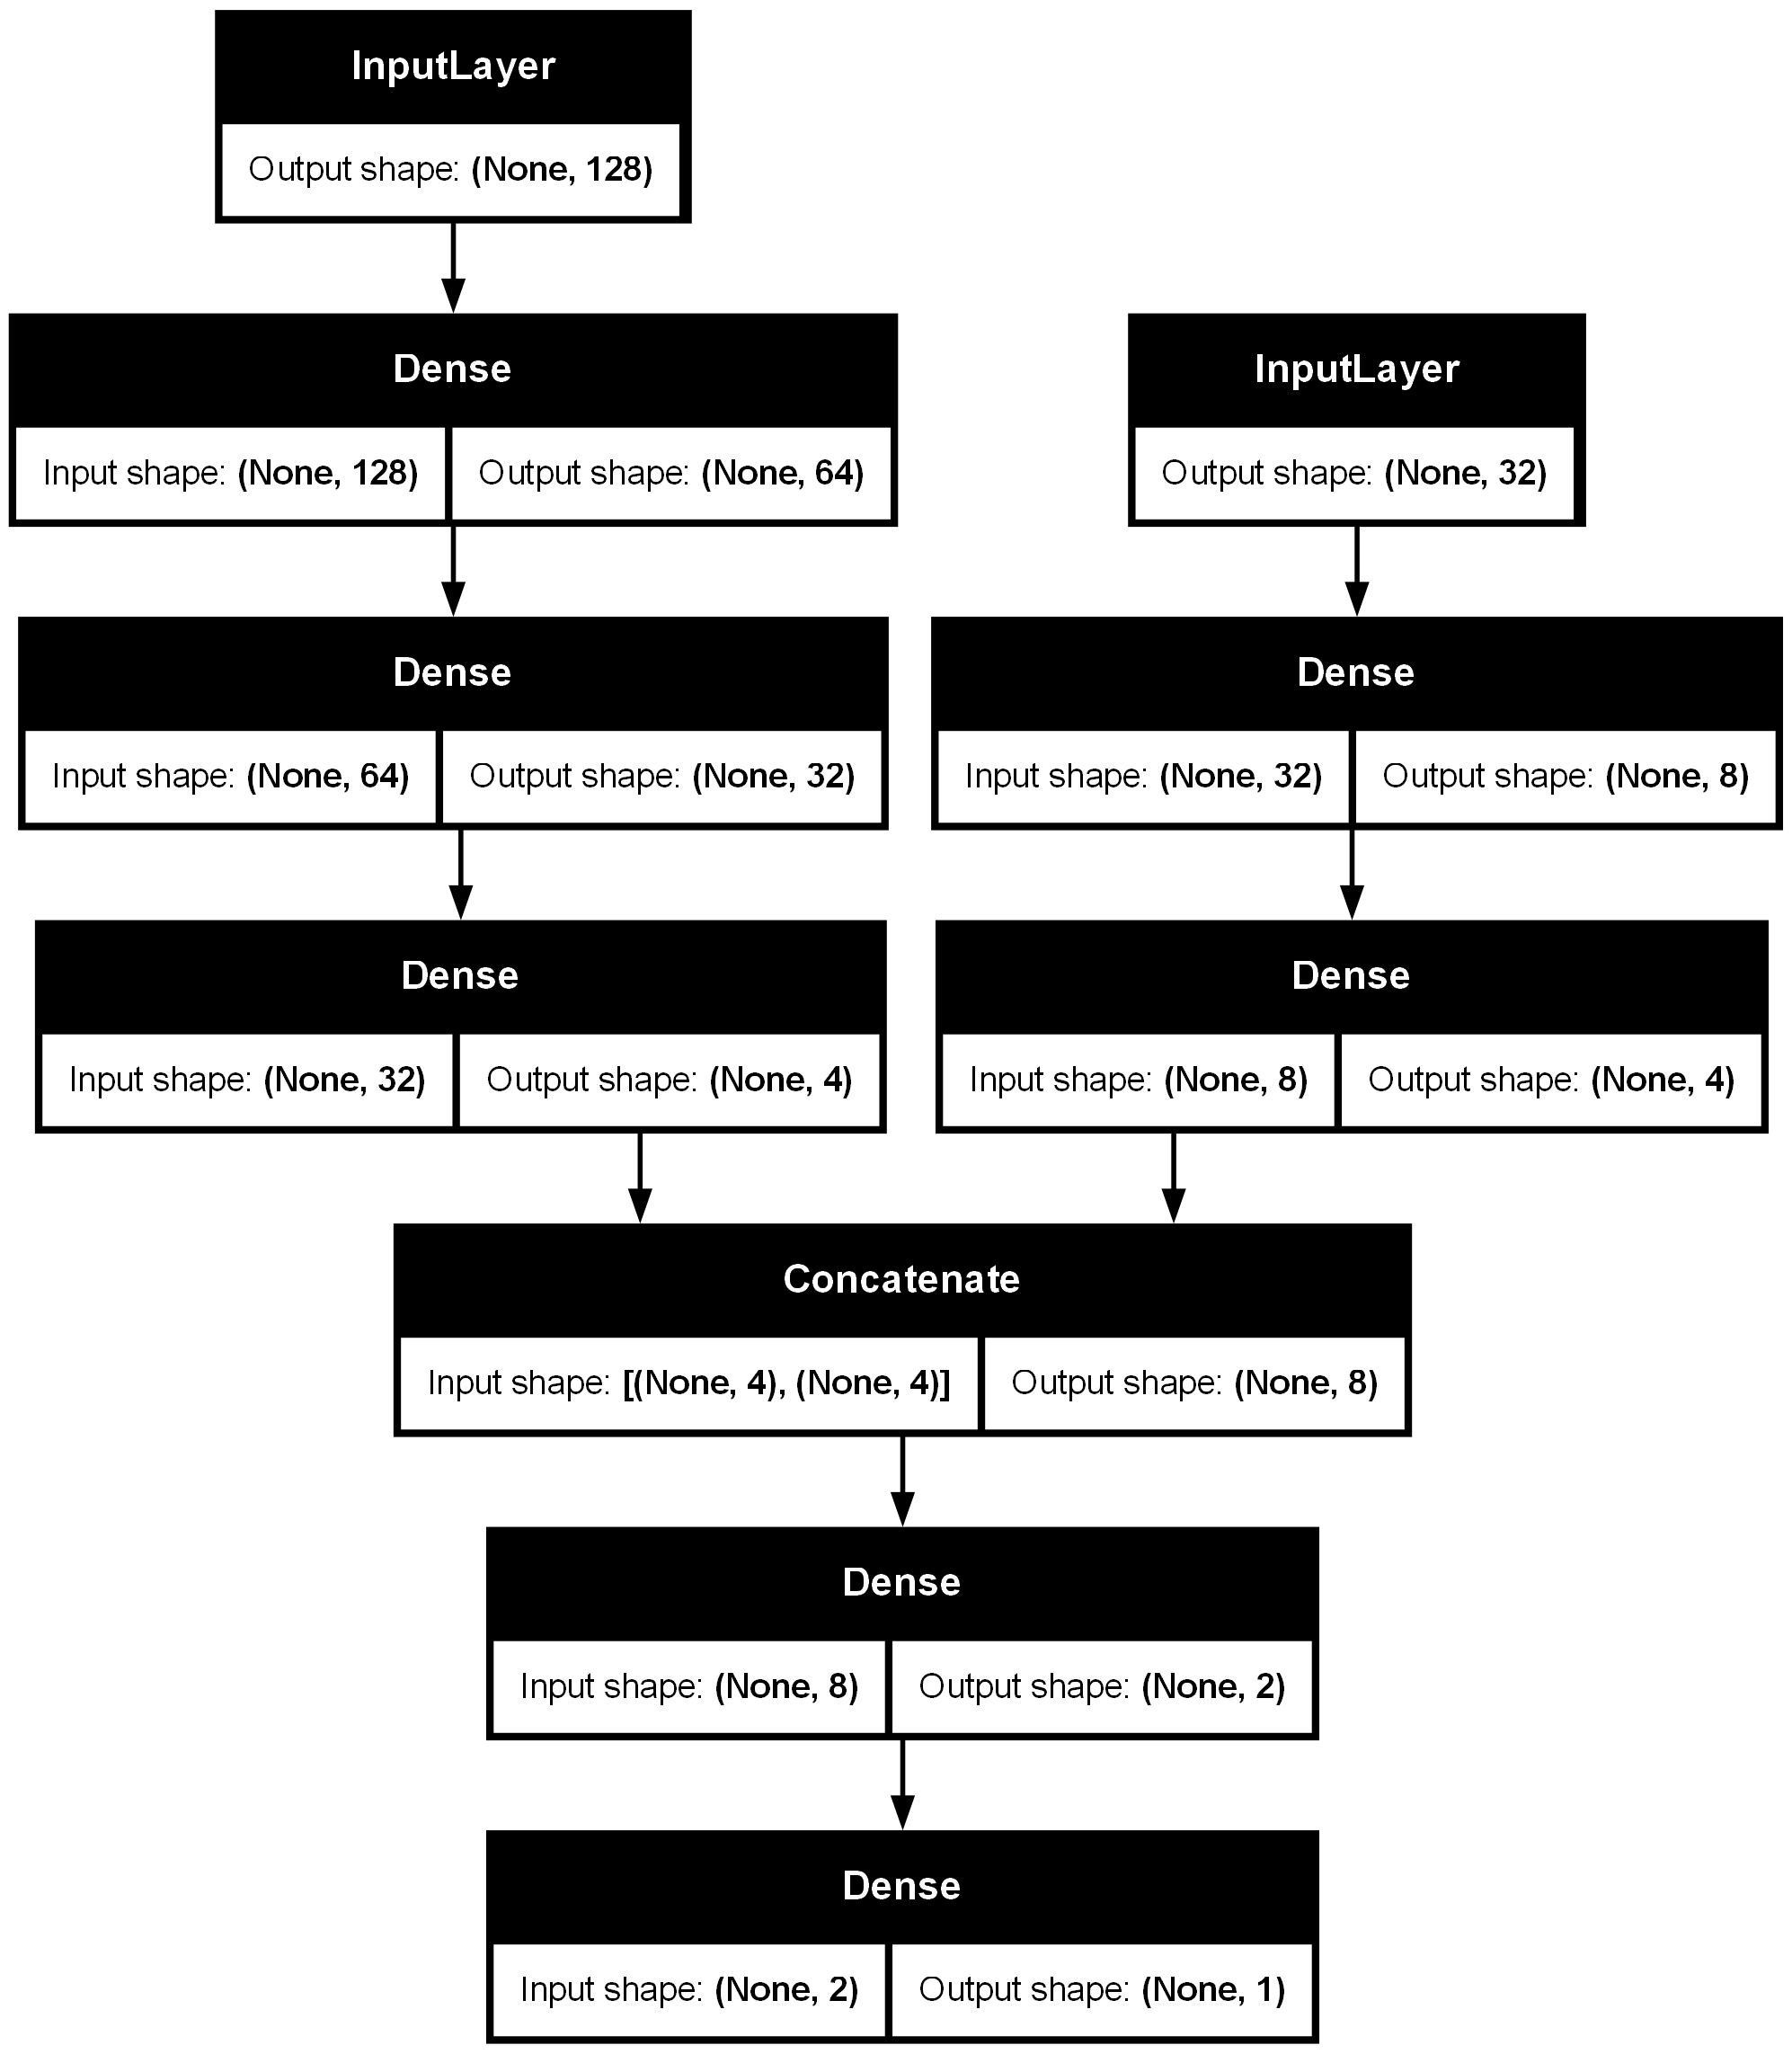

In [6]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)